In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import svm , metrics ,datasets 
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedKFold , GridSearchCV , ParameterGrid
from sklearn.inspection import DecisionBoundaryDisplay , permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay , mean_squared_error , accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import multiprocessing

# Modelos machine learning
### Javier Saavedra

## Introduccion


## Datos
Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa.
Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder a si el producto (depósito a plazo bancario) estaría (o no) suscrito.

## variables 
La data corresponde a una serie de variables categoricas y numericas de tal forma que la variable de respuesta es de tipo binaria lo cual nos permite usar el machine learning para modelos de clasificacion


# Analisis exploratorio

In [3]:
df = pd.read_csv('bank.csv',sep=';')

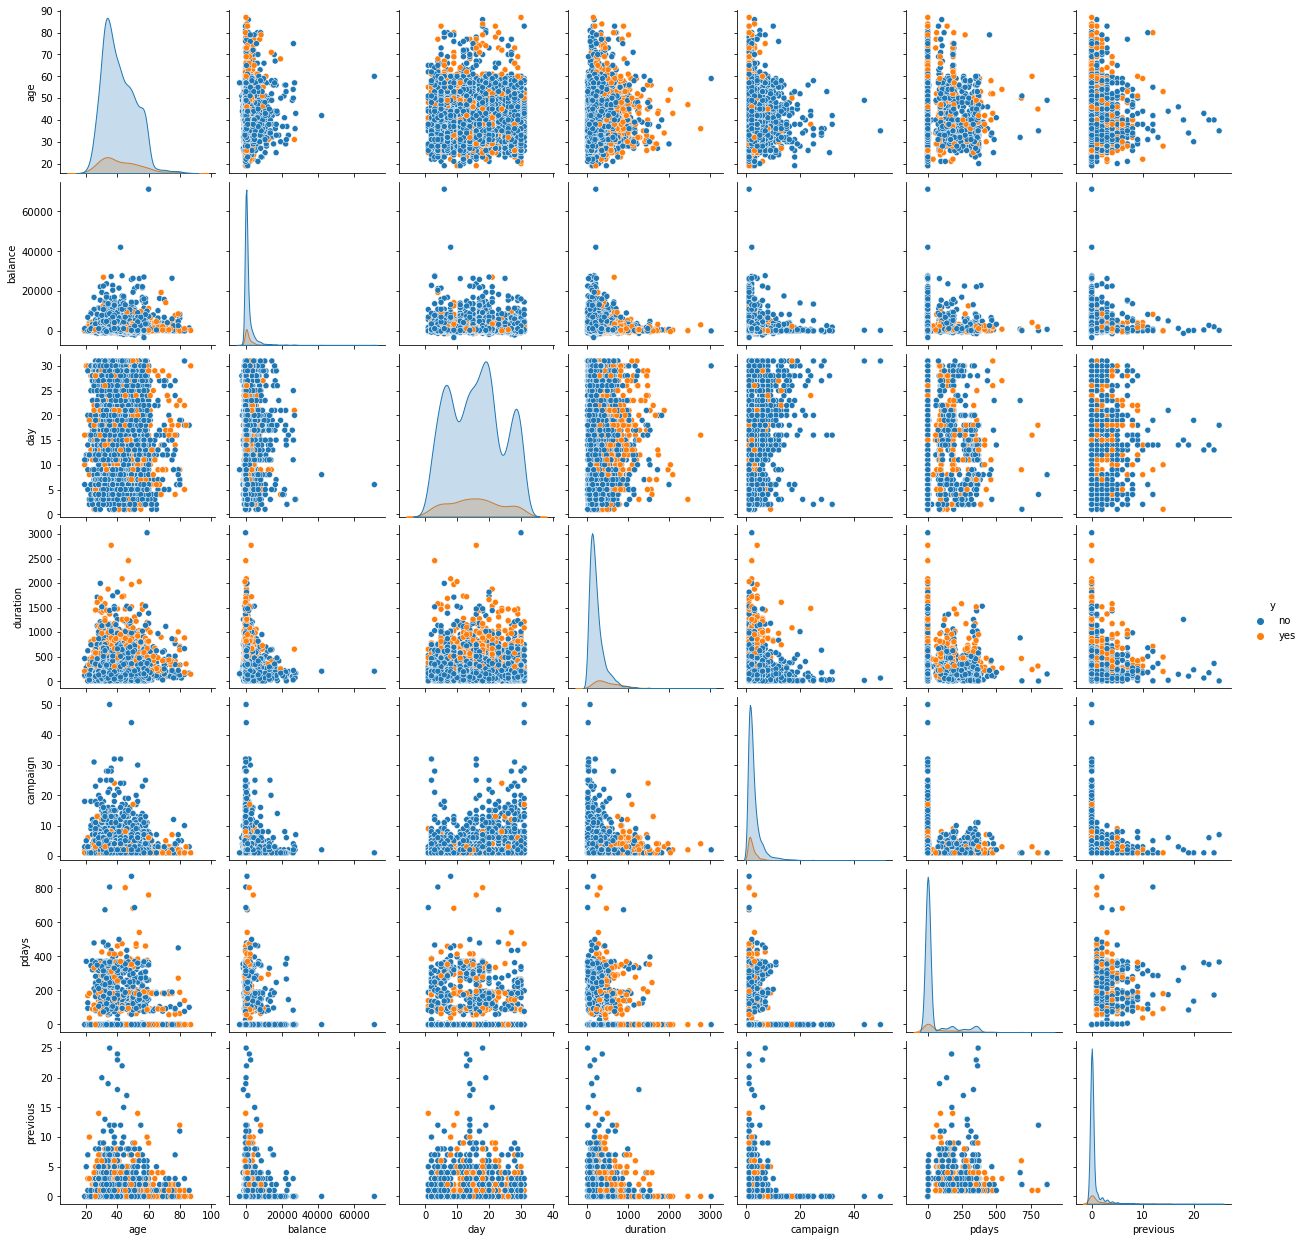

In [3]:
sns.pairplot(df, kind="scatter", hue="y")
plt.show()

In [26]:

df_dumm = pd.get_dummies(df,drop_first=True)
# df_dumm.info()


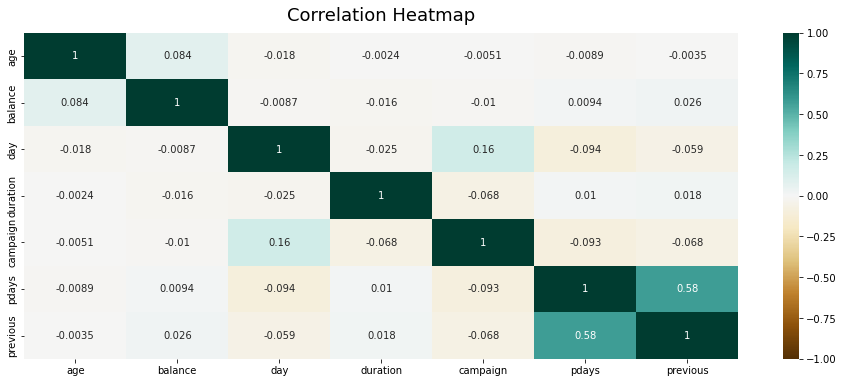

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


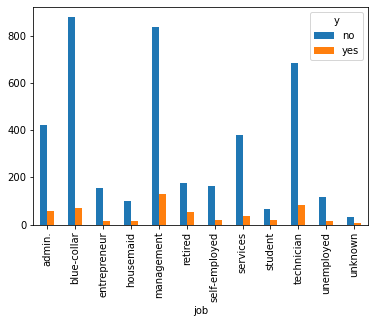

In [5]:
# df.value_counts(["y","marital"])
CrosstabResult=pd.crosstab(index=df[ 'job'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


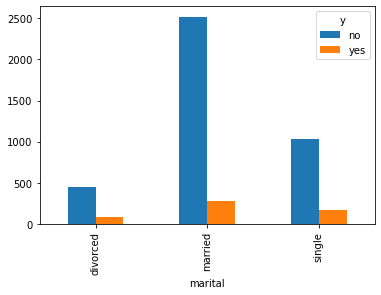

In [6]:
CrosstabResult=pd.crosstab(index=df[ 'marital'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


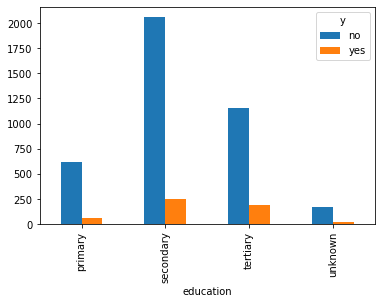

In [7]:
CrosstabResult=pd.crosstab(index=df[ 'education'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


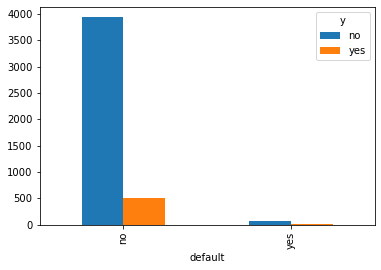

In [8]:
CrosstabResult=pd.crosstab(index=df[ 'default'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


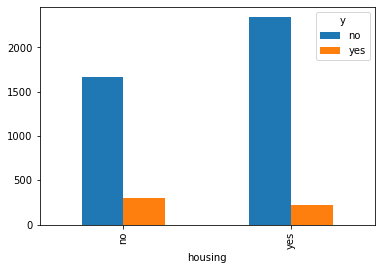

In [9]:
CrosstabResult=pd.crosstab(index=df[ 'housing'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


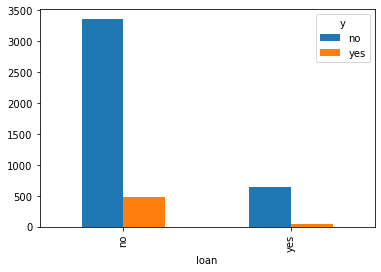

In [10]:
CrosstabResult=pd.crosstab(index=df[ 'loan'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


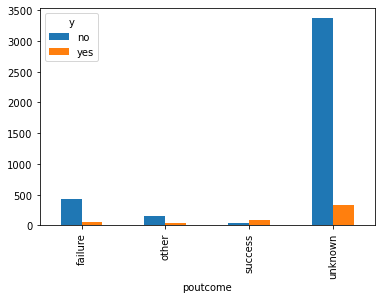

In [11]:
CrosstabResult=pd.crosstab(index=df[ 'poutcome'],columns=df[ 'y'])
print(CrosstabResult.plot.bar())

In [7]:
#  N = 4
# barWidth = .5
# xloc = np. arange (N)

# # mostrar gráfico de barras apiladas
#  p1 = plt. bar (xloc, product_A, width = barWidth)
# p2 = plt. bar (xloc, product_B, bottom = product_A, width = barWidth)
# plt. mostrar ()

# SVM

In [18]:
Y = df_dumm.y_yes
df_dummx = df_dumm.drop(['y_yes'],axis=1)
X = df_dummx

In [29]:
# Y.value_counts()

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size   = 0.8,
#                                         random_state = 1234,
#                                         stratify      = True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y)

In [30]:
# y_train.value_counts()

## modelo base

In [40]:
#svm
clf =svm.SVC(gamma="auto")
clf.fit(X_train,y_train)

SVC(gamma='auto')

In [41]:
#predict
predicciones = clf.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 88.50574712643679%


In [42]:
classifier = clf.fit(X_train, y_train)
np.set_printoptions(precision=2)
class_names = ["yes","no"]
# SVC(C=0.1, gamma=0.01, kernel='sigmoid')

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## matriz de confusion

Confusion matrix, without normalization
[[1001    0]
 [ 130    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


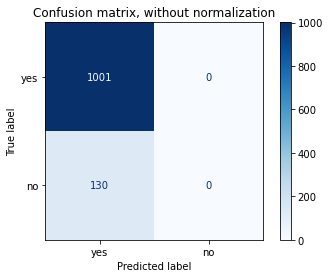

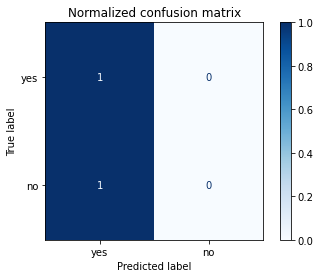

In [43]:
plt.show()

In [31]:
# param_grid = {'C': [0.001,0.1,1, 10, 100], 'gamma': [2,1,0.1,0.01,0.001],'kernel': ["sigmoid",'rbf',"linear"]}
# grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train,y_train)
# print(grid.best_estimator_)

## modelo optimizado

In [46]:
# SVC(C=0.1, gamma=2, kernel='linear') #mejores parametros

modelo = svm.SVC(C=0.1, gamma=2, kernel='linear').fit(X_train,y_train)
#predict
predicciones = modelo.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("modelo mejorado")
print("SVC(C=0.1, gamma=2, kernel='linear') mejores parametros")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 90.36251105216623%


In [ ]:
classifier = modelo.fit(X_train, y_train)
np.set_printoptions(precision=2)
class_names = ["yes","no"]
# SVC(C=0.1, gamma=0.01, kernel='sigmoid')
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## matriz de confusion

Confusion matrix, without normalization
[[987  14]
 [ 95  35]]
Normalized confusion matrix
[[0.99 0.01]
 [0.73 0.27]]


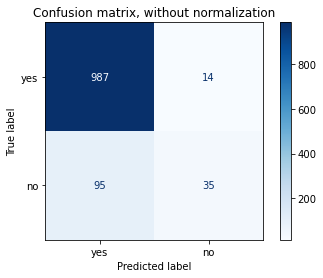

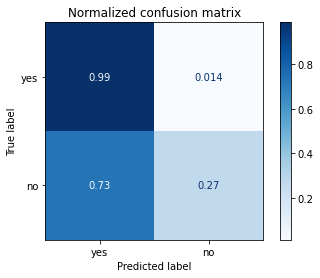

In [47]:
plt.show()

In [20]:
# X = X.to_numpy()
# Y = Y.to_numpy()

# Random forest

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10,
                      n_jobs=-1, random_state=123)

In [23]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse1 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse1}")

El error (rmse) de test es: 0.28743483527642705


In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();

## optimizacion del modelo

Valor óptimo de n_estimators: 146


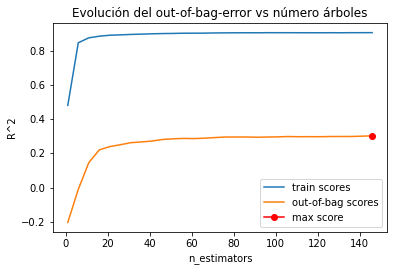

In [24]:
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    

Valor óptimo de n_estimators: 146


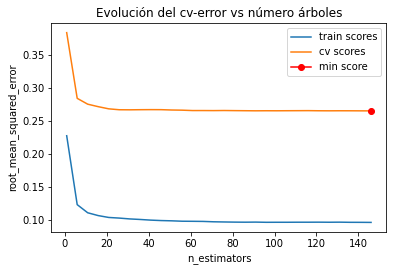

In [25]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 7


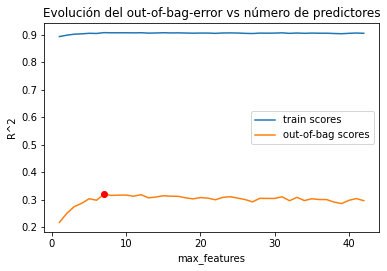

In [26]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();

Valor óptimo de max_features: 10


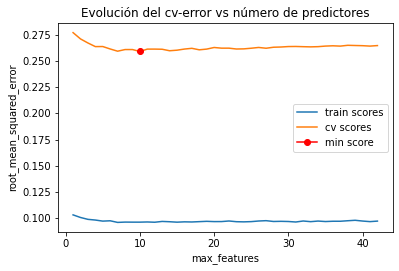

In [27]:
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [28]:

param_grid = {'n_estimators': [91,115,146],
              'max_features': [11, 15, 18],
              'max_depth'   : [None, 10, 20]
             }
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
print(grid.best_params_)

{'max_depth': None, 'max_features': 11, 'n_estimators': 146}


In [29]:
#modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El nuevo error (rmse) de test es: {rmse}" + f"\nversus el modelo estandar aplicado anteriormente: {rmse1}")
print('\nSe ah conseguido reducir el error en',(rmse1-rmse))

El nuevo error (rmse) de test es: 0.27922656563195436
versus el modelo estandar aplicado anteriormente: 0.28743483527642705

Se ah conseguido reducir el error en 0.008208269644472688


# Redes neuronales

In [14]:
#Librerias para los diferentes modelos
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
model = Sequential()
#Input layer, input_dim, debe coincider con el numero de variables independientes
model.add(Dense(50, kernel_initializer = "normal", input_dim = 42, activation = "relu"))
#Hidden layer
#Cada capa con 60 neuronas
model.add(Dense(40, kernel_initializer = "normal", activation = "relu"))
model.add(Dense(40, kernel_initializer = "normal", activation = "relu"))
model.add(Dense(40, kernel_initializer = "normal", activation = "relu"))
#output layer
#Siempre es 1 neurona de respuesta
#Clasificacion usar sigmoid en activication
model.add(Dense(1, kernel_initializer = "normal", activation = "sigmoid"))

## modelo base

In [23]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                2150      
                                                                 
 dense_6 (Dense)             (None, 40)                2040      
                                                                 
 dense_7 (Dense)             (None, 40)                1640      
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,511
Trainable params: 7,511
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, verbose = False)

## comportamiento del modelo

In [27]:
# Confusion Matrix
from sklearn import metrics
pred = model.predict(X_test)
model.evaluate(X_train,y_train)

106/106 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9136


[0.20141176879405975, 0.9135693311691284]

## conclusion
los modelos ML no ibtuvieron los mejores resultados en esta clasificacion por lo cual seria interesentante comparar los resultados con modelos clasicos como un modelo lineal generalizado ej: modelo logit.